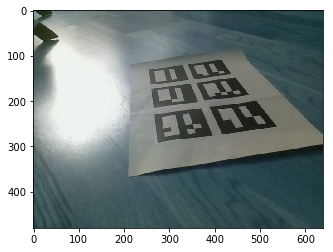


points got:
0 [ 297.    141.75] [ 343.  152.  260.  164.  255.  131.  330.  120.]
1 [ 387.75  130.5 ] [ 438.  141.  356.  152.  341.  120.  416.  109.]
2 [ 309.25  187.75] [ 364.  200.  266.  216.  260.  173.  347.  162.]
3 [ 415.25  173.25] [ 477.  186.  378.  199.  360.  160.  446.  148.]
4 [ 327.25  253.  ] [ 396.  273.  275.  293.  267.  230.  371.  216.]
5 [ 459.5  235. ] [ 538.  254.  418.  274.  389.  213.  493.  199.]
[[ 297.    141.75]
 [ 387.75  130.5 ]
 [ 309.25  187.75]
 [ 415.25  173.25]
 [ 327.25  253.  ]] [[ 0.   0.   0. ]
 [ 0.   0.3  0. ]
 [ 0.3  0.   0. ]
 [ 0.3  0.3  0. ]
 [ 0.6  0.   0. ]]

camera intrinsic matrix:
[[ 640.    0.  320.]
 [   0.  640.  240.]
 [   0.    0.    1.]] [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


error: /tmp/binarydeb/ros-kinetic-opencv3-3.2.0/modules/imgproc/src/undistort.cpp:293: error: (-215) CV_IS_MAT(_src) && CV_IS_MAT(_dst) && (_src->rows == 1 || _src->cols == 1) && (_dst->rows == 1 || _dst->cols == 1) && _src->cols + _src->rows - 1 == _dst->rows + _dst->cols - 1 && (CV_MAT_TYPE(_src->type) == CV_32FC2 || CV_MAT_TYPE(_src->type) == CV_64FC2) && (CV_MAT_TYPE(_dst->type) == CV_32FC2 || CV_MAT_TYPE(_dst->type) == CV_64FC2) in function cvUndistortPoints


In [82]:
import qrcode
import matplotlib.pyplot as plt
import cv2
import numpy as np



def find_marker(img):
    result = qrcode.marker().find(img,debug = 0, show = 0)
    return result


fn = './data/marker.jpg'
img = cv2.imread(fn)
plt.imshow(img,cmap='gray'); plt.show()
res = find_marker(img)
scale = 1.0
centers = np.zeros((10,2))
corners = np.zeros((10,2*4))
for r in res:
    code = r[0]
    pos = r[1].reshape(4,2)
    pos = np.float32(pos)
    pos[:,0] = pos[:,0]/scale
    pos[:,1] = pos[:,1]/scale

    center = np.mean(pos,axis=0)
    centers[code] = center
    corners[code] = pos.reshape(1,-1)

print "\npoints got:"
for i in range(6):
    print i,centers[i],corners[i]

    
    
# image points
imp_all = centers[:6]
# object points
w = 0.3
objp_all = np.array([[0, 0, 0],           
                        [0, w, 0.],       
                        [w, 0., 0.],     
                        [w, w, 0.],      
                        [2*w, 0, .0],    
                        [2*w, w, .0]], dtype = 'double')
imp =imp_all[:5]
objp = objp_all[:5]
print imp,objp
# camera matrix
size = img.shape
focal_length = size[1]
center = (size[1]/2, size[0]/2)
mtx = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )
# distortion coeffs
dist = np.zeros((4,1)) 
print "\ncamera intrinsic matrix:\n",mtx,dist

# rotation vectors, transform vectors
_, rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, imp, mtx, dist)
# convert to rotation matrix
rmtx,_ = cv2.Rodrigues(rvecs)
print "rotation matrix\n",rmtx
# extrinsic matrix
exc = np.hstack((rmtx,tvecs))
exc = np.vstack((exc,np.array([0,0,0,1])))
print "extrinsic matrix\n",exc
#http://answers.opencv.org/question/64315/solvepnp-object-to-camera-pose/

# test the exc matrix

p_im,_ = cv2.projectPoints(objp, rvecs, tvecs, mtx, dist)
print p_im



#https://stackoverflow.com/questions/12299870/computing-x-y-coordinate-3d-from-image-point
tmp1 = np.dot(np.linalg.inv(rmtx), np.linalg.inv(mtx))
tmp2 = np.dot(np.linalg.inv(rmtx), tvecs)



Camera Matrix :
 [[  1.20000000e+03   0.00000000e+00   6.00000000e+02]
 [  0.00000000e+00   1.20000000e+03   3.37000000e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
Rotation Vector:
 [[-0.0581844 ]
 [ 2.20231074]
 [ 0.01887552]]
Translation Vector:
 [[  449.53365497]
 [  -95.72475146]
 [-2344.07917989]]


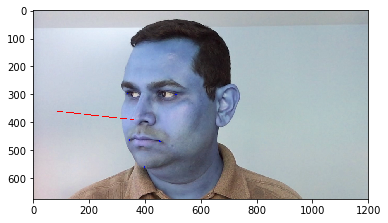

In [72]:
#!/usr/bin/env python
 
import cv2
import numpy as np
 
# Read Image
im = cv2.imread("headPose.jpg");
size = im.shape




#2D image points. If you change the image, you need to change vector
image_points = np.array([
                            (359, 391),     # Nose tip
                            (399, 561),     # Chin
                            (337, 297),     # Left eye left corner
                            (513, 301),     # Right eye right corne
                            (345, 465),     # Left Mouth corner
                            (453, 469)      # Right mouth corner
                        ], dtype="double")

# 3D model points.
model_points = np.array([
                            (0.0, 0.0, 0.0),             # Nose tip
                            (0.0, -330.0, -65.0),        # Chin
                            (-225.0, 170.0, -135.0),     # Left eye left corner
                            (225.0, 170.0, -135.0),      # Right eye right corne
                            (-150.0, -150.0, -125.0),    # Left Mouth corner
                            (150.0, -150.0, -125.0)      # Right mouth corner
                         
                        ])

 
# Camera internals
size = im.shape

focal_length = size[1]
center = (size[1]/2, size[0]/2)
camera_matrix = np.array(
                         [[focal_length, 0, center[0]],
                         [0, focal_length, center[1]],
                         [0, 0, 1]], dtype = "double"
                         )
 
print "Camera Matrix :\n {0}".format(camera_matrix)
 
dist_coeffs = np.zeros((4,1)) # Assuming no lens distortion
_,rotation_vector, translation_vector = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)
 
print "Rotation Vector:\n {0}".format(rotation_vector)
print "Translation Vector:\n {0}".format(translation_vector)
 
 
# Project a 3D point (0, 0, 1000.0) onto the image plane.
# We use this to draw a line sticking out of the nose
 
 
nose_end_point2D, jacobian = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rotation_vector, translation_vector, camera_matrix, dist_coeffs)
 
for p in image_points:
    cv2.circle(im, (int(p[0]), int(p[1])), 3, (0,0,255), -1)
 
 
p1 = ( int(image_points[0][0]), int(image_points[0][1]))
p2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))
 
cv2.line(im, p1, p2, (255,0,0), 2)
 
# Display image
plt.imshow(im)
plt.show()

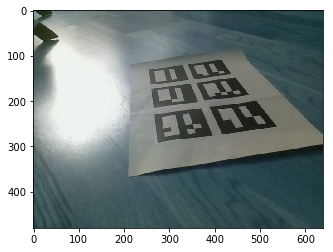

[[ 0.59835023  0.00136334]
 [ 0.60772872  0.30999848]]
[[ 0.          0.        ]
 [ 0.          0.30000001]
 [ 0.30000001  0.        ]
 [ 0.30000001  0.30000001]]


In [151]:
import qrcode
import matplotlib.pyplot as plt
import cv2
import numpy as np

def find_transform(imgp,imgp_test):
    w = 0.3
    # object points
    imgp = np.float32(np.array([imgp]))
    imgp_test =np.float32(np.array([imgp_test]))
    objp = np.array([[0,0],[0,w],[w,0],[w,w]], dtype = "float32")

    #m = cv2.getPerspectiveTransform(imp,objp)
    m,_ = cv2.findHomography(imgp,objp)
    
    objp_test = cv2.perspectiveTransform(imgp_test,m)
    
    objp_test = objp_test.reshape(-1,2)
    objp = objp.reshape(-1,2)
    return objp_test, objp

def find_position(img):
    res = qrcode.marker().find(img,debug = 0, show = 0)
    scale = 1.0
    centers = np.zeros((10,2))
    corners = np.zeros((10,2*4))
    for r in res:
        code = r[0]
        pos = r[1].reshape(4,2)
        pos = np.float32(pos)
        pos[:,0] = pos[:,0]/scale
        pos[:,1] = pos[:,1]/scale

        center = np.mean(pos,axis=0)
        centers[code] = center
        corners[code] = pos.reshape(1,-1)
    # image points
    objp_test,objp = find_transform(centers[:4],centers[4:6])
    return objp_test,objp

fn = './data/marker.jpg'
img = cv2.imread(fn)
plt.imshow(img,cmap='gray'); plt.show()
p1,p2 = find_position(img)
print p1
print p2
#https://stackoverflow.com/questions/11237948/findhomography-getperspectivetransform-getaffinetransform

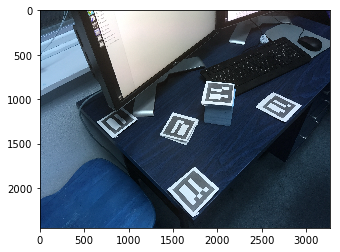


points got:
0 [  872.    1248.25] [  904.  1111.  1059.  1233.   842.  1396.   683.  1253.]
1 [ 2691.5  1084. ] [ 2652.   958.  2884.  1072.  2731.  1217.  2499.  1089.]
2 [ 1565.25  1319.  ] [ 1503.  1185.  1744.  1250.  1631.  1453.  1383.  1388.]
3 [ 1727.75  2025.75] [ 1731.  1799.  1970.  2018.  1722.  2269.  1488.  2017.]
4 [ 0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  0.]
5 [ 0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  0.]
[[  4.39077895e-05  -4.30234276e-04   4.98752343e-01]
 [ -3.13597509e-05  -3.47391578e-04   4.60977240e-01]
 [  3.20665681e-04  -1.25573588e-03   1.00000000e+00]]
[[ 0.          0.        ]
 [ 0.30000001  0.        ]
 [ 0.          0.30000001]
 [ 0.30000001  0.30000001]]
[[[  1.92846268e-16  -3.85692535e-16]
  [  3.00000012e-01   2.21224306e-16]
  [ -3.59542934e-16   3.00000012e-01]
  [  3.00000012e-01   3.00000012e-01]]]
[[[ 0.  0.]
  [ 0.  0.]]]
[[[ 0.49875234  0.46097724]
  [ 0.49875234  0.46097724]]]


In [137]:
import qrcode
import matplotlib.pyplot as plt
import cv2
import numpy as np



def find_marker(img):
    result = qrcode.marker().find(img,debug = 0, show = 0)
    return result


fn = './data/set2.jpg'
img = cv2.imread(fn)
plt.imshow(img,cmap='gray'); plt.show()
res = find_marker(img)
scale = 1.0
centers = np.zeros((10,2))
corners = np.zeros((10,2*4))
for r in res:
    code = r[0]
    pos = r[1].reshape(4,2)
    pos = np.float32(pos)
    pos[:,0] = pos[:,0]/scale
    pos[:,1] = pos[:,1]/scale

    center = np.mean(pos,axis=0)
    centers[code] = center
    corners[code] = pos.reshape(1,-1)

print "\npoints got:"
for i in range(6):
    print i,centers[i],corners[i]

# image points
imp = np.float32(centers[:4])
# object points
w = 0.3
objp = np.array([[0,0],[w,0],[0,w],[w,w]], dtype = "float32")


#m = cv2.getPerspectiveTransform(imp,objp)
m,_ = cv2.findHomography(imp,objp)

print m
print objp
print cv2.perspectiveTransform(np.array([imp]), m)

testp = np.array([centers[4:6]])
print testp
print cv2.perspectiveTransform(testp,m)

#https://stackoverflow.com/questions/11237948/findhomography-getperspectivetransform-getaffinetransform